### Assignment Submitted by VINAY M on 06-09-2023

In [1]:
## Part 2 - Reading Imputed Data and Performing Remaining Pre-Processing

In [12]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Reading CSV Dataset
df = pd.read_csv('imputed_loan_default_data.csv')

In [14]:
df

,Unnamed: 0,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,cf,nopre,type1,p1,l1,nopc,nob/c,116500.0,360.0,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.000000
1,1,cf,nopre,type2,p1,l1,nopc,b/c,206500.0,360.0,...,EQUI,552.0,EXP,55-64,to_inst,72.746457,North,direct,1.0,37.732932
2,2,cf,pre,type1,p1,l1,nopc,nob/c,406500.0,360.0,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.000000
3,3,cf,nopre,type1,p4,l1,nopc,nob/c,456500.0,360.0,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.000000
4,4,cf,pre,type1,p1,l1,nopc,nob/c,696500.0,360.0,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,148665,cf,nopre,type1,p3,l1,nopc,nob/c,436500.0,180.0,...,CIB,659.0,EXP,55-64,to_inst,71.792763,south,direct,0.0,48.000000
148666,148666,cf,nopre,type1,p1,l1,nopc,nob/c,586500.0,360.0,...,CIB,569.0,CIB,25-34,not_inst,74.428934,south,direct,0.0,15.000000
148667,148667,cf,nopre,type1,p4,l1,nopc,nob/c,446500.0,180.0,...,CIB,702.0,EXP,45-54,not_inst,61.332418,North,direct,0.0,49.000000
148668,148668,cf,nopre,type1,p4,l1,nopc,nob/c,196500.0,180.0,...,EXP,737.0,EXP,55-64,to_inst,70.683453,North,direct,0.0,29.000000


In [15]:
# Checking DType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   loan_limit                 148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  float64
 9   term                       148670 non-null  float64
 10  Neg_ammortization          148670 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lump_sum_payment           148670 non-null  object 
 13  property_value             14

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
# Checking missing values
df.isna().sum()

loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

In [18]:
# Listing categorical columns
catCol = []
for col in df.select_dtypes(include=[object]).columns:
    catCol.append(col)
print(f"{len(catCol)} out of {df.shape[1]} are categorical")
catCol

20 out of 28 are categorical


['loan_limit',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [19]:
# counting Numerical columns
numricalCol = []
for col in df.select_dtypes(include=[int, float]).columns:
    numricalCol.append(col)
print(f"{len(numricalCol)} out of {df.shape[1]} are Numerical")
numricalCol

8 out of 28 are Numerical


['loan_amount',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [20]:
# Outliers Visualisation of Numerical Columns

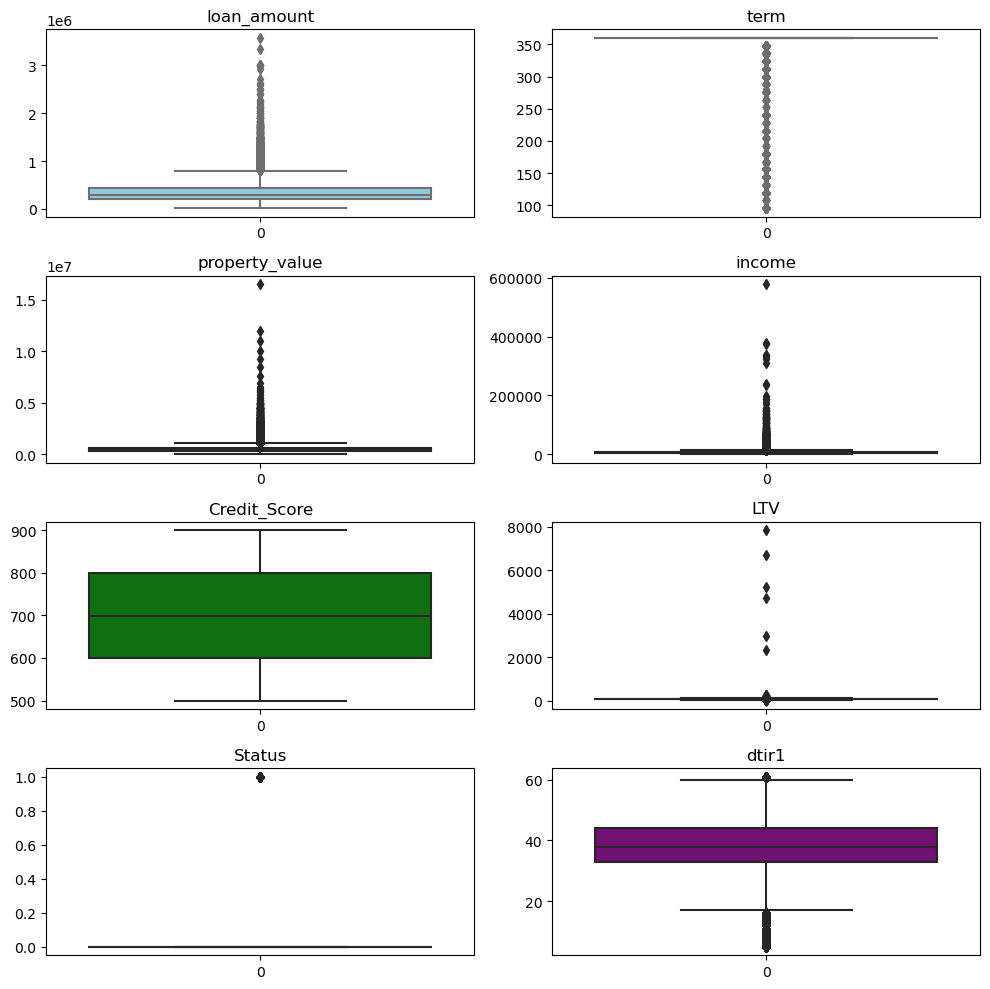

In [24]:
# Before Outlier Treatment
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

#first subplot
sns.boxplot(ax=axes[0, 0], data=df['loan_amount'], color='skyblue')
axes[0, 0].set_title('loan_amount')

#second subplot
sns.boxplot(ax=axes[0, 1], data=df['term'], color='salmon')
axes[0, 1].set_title('term')

#third subplot
sns.boxplot(ax=axes[1, 0], data=df['property_value'], color='green')
axes[1, 0].set_title('property_value')

#fourth subplot
sns.boxplot(ax=axes[1, 1], data=df['income'], color='purple')
axes[1, 1].set_title('income')

#fifth subplot
sns.boxplot(ax=axes[2, 0], data=df['Credit_Score'], color='green')
axes[2, 0].set_title('Credit_Score')

#sixth subplot
sns.boxplot(ax=axes[2, 1], data=df['LTV'], color='purple')
axes[2, 1].set_title('LTV')

#Seventh subplot
sns.boxplot(ax=axes[3, 0], data=df['Status'], color='green')
axes[3, 0].set_title('Status')

#Eight subplot
sns.boxplot(ax=axes[3, 1], data=df['dtir1'], color='purple')
axes[3, 1].set_title('dtir1')

plt.tight_layout()
plt.show()

In [25]:
# Define a function to check for outliers using IQR
def checkoutliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [26]:
# Iterate through numerical columns and check for outliers
for col in df.select_dtypes(include=[int, float]).columns:
    outliers = checkoutliers(df[col])
    if not outliers.empty:
        print(f"Outliers present in {col} with {len(outliers)} values which accounts {round(((len(outliers)/df.shape[0])*100),2)}%")
    else:
        pass

Outliers present in loan_amount with 1895 values which accounts 1.27%
Outliers present in term with 26985 values which accounts 18.15%
Outliers present in property_value with 6596 values which accounts 4.44%
Outliers present in income with 7636 values which accounts 5.14%
Outliers present in LTV with 4671 values which accounts 3.14%
Outliers present in Status with 36639 values which accounts 24.64%
Outliers present in dtir1 with 5508 values which accounts 3.7%


In [29]:
# term and Status is not appropriate for outlier capping or Deletion

In [48]:
def remove_outliers_iqr(df):
    # Calculate the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows containing outliers in any numerical column
    outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

    # Delete rows with outliers and return the cleaned DataFrame
    df_cleaned = df[~outliers]

    return df_cleaned

In [49]:
OutlierRemoved = remove_outliers_iqr(df)
OutlierRemoved

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
2,cf,pre,type1,p1,l1,nopc,nob/c,406500.0,360.0,neg_amm,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,cf,nopre,type1,p4,l1,nopc,nob/c,456500.0,360.0,not_neg,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,cf,pre,type1,p1,l1,nopc,nob/c,696500.0,360.0,not_neg,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0
5,cf,pre,type1,p1,l1,nopc,nob/c,706500.0,360.0,not_neg,...,EXP,864.0,EXP,35-44,not_inst,70.089286,North,direct,0.0,40.0
6,cf,pre,type1,p3,l1,nopc,nob/c,346500.0,360.0,not_neg,...,EXP,860.0,EXP,55-64,to_inst,79.109589,North,direct,0.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148656,cf,nopre,type2,p3,l1,nopc,b/c,226500.0,360.0,neg_amm,...,EXP,665.0,CIB,45-54,to_inst,84.514925,south,direct,0.0,51.0
148659,cf,nopre,type3,p3,l1,nopc,nob/c,416500.0,360.0,neg_amm,...,EXP,520.0,EXP,65-74,to_inst,68.503289,south,direct,0.0,40.0
148660,cf,nopre,type1,p4,l1,nopc,nob/c,366500.0,360.0,not_neg,...,CIB,851.0,EXP,45-54,not_inst,55.699088,North,direct,0.0,20.0
148662,cf,nopre,type1,p4,l1,nopc,nob/c,646500.0,360.0,not_neg,...,CIB,873.0,EXP,45-54,not_inst,78.079710,North,direct,0.0,31.0


In [50]:
df.shape

(148670, 28)

In [51]:
OutlierRemoved.shape

(80887, 28)

In [52]:
df.shape[0]-OutlierRemoved.shape[0]

67783

In [53]:
(df.shape[0]-OutlierRemoved.shape[0])/df.shape[0]

0.4559292392547252

In [54]:
# 45% Data Lost

In [55]:
# Not an ideal solution

In [57]:
# Its better to do Winsorisation with Feature Engine

In [58]:
from feature_engine.outliers import Winsorizer

In [59]:
cols_to_treat = []
for col in df.select_dtypes(include=[int, float]).columns:
    if not (col == 'term' or col == 'Status'):
        cols_to_treat.append(col)
cols_to_treat

['loan_amount', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

In [61]:
winsorizer_iqr = Winsorizer(capping_method='iqr',
                                 tail='both',
                                 fold=1.5, #outliers values will be capped at 1.5
                                 variables=cols_to_treat)
dfNew = winsorizer_iqr.fit_transform(df)

In [62]:
dfNew

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,nopre,type1,p1,l1,nopc,nob/c,116500.0,360.0,not_neg,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.000000
1,cf,nopre,type2,p1,l1,nopc,b/c,206500.0,360.0,not_neg,...,EQUI,552.0,EXP,55-64,to_inst,72.746457,North,direct,1.0,37.732932
2,cf,pre,type1,p1,l1,nopc,nob/c,406500.0,360.0,neg_amm,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.000000
3,cf,nopre,type1,p4,l1,nopc,nob/c,456500.0,360.0,not_neg,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.000000
4,cf,pre,type1,p1,l1,nopc,nob/c,696500.0,360.0,not_neg,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,nopre,type1,p3,l1,nopc,nob/c,436500.0,180.0,not_neg,...,CIB,659.0,EXP,55-64,to_inst,71.792763,south,direct,0.0,48.000000
148666,cf,nopre,type1,p1,l1,nopc,nob/c,586500.0,360.0,not_neg,...,CIB,569.0,CIB,25-34,not_inst,74.428934,south,direct,0.0,16.500000
148667,cf,nopre,type1,p4,l1,nopc,nob/c,446500.0,180.0,not_neg,...,CIB,702.0,EXP,45-54,not_inst,61.332418,North,direct,0.0,49.000000
148668,cf,nopre,type1,p4,l1,nopc,nob/c,196500.0,180.0,not_neg,...,EXP,737.0,EXP,55-64,to_inst,70.683453,North,direct,0.0,29.000000


In [64]:
# Iterate through numerical columns and check for outliers
for col in dfNew.select_dtypes(include=[int, float]).columns:
    outliers = checkoutliers(dfNew[col])
    if not outliers.empty:
        print(f"Outliers present in {col} with {len(outliers)} values which accounts {round(((len(outliers)/df.shape[0])*100),2)}%")
    else:
        pass

Outliers present in term with 26985 values which accounts 18.15%
Outliers present in Status with 36639 values which accounts 24.64%


In [65]:
# All outliers Deleted Except the term and Status - Not required to remove Outliers

In [66]:
#Saving Imputed Dataframe as it takes more time when we run 
dfNew.to_csv('cleanedData.csv', index=True)